In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [81]:
dfx=pd.read_csv('/Users/kaushikchaturvedula/python/chemical/Logistic_X_Train.csv')
dfy=pd.read_csv('/Users/kaushikchaturvedula/python/chemical/Logistic_Y_Train.csv')
x_train=dfx.values
y_train=dfy.values
x_train.reshape((-1,))
y_train=np.array([int(i) for i in list(y_train)])
x_train,y_train

(array([[-1.23937466,  0.74910149, -0.52851491],
        [-1.03607028,  0.80143631, -1.28371152],
        [-0.61557914,  1.57952053, -1.39192706],
        ...,
        [ 0.08827657,  1.63878904, -2.19364056],
        [ 1.52515501,  0.85923429,  1.50530791],
        [-0.97981744,  0.56395376, -1.53939416]]),
 array([1, 1, 1, ..., 1, 0, 1]))

In [82]:
cls0=[]
cls1=[]
i=0
while(i<len(y_train)):
    if y_train[i]==0:
        cls0.append(list(x_train[i]))
    else:
        cls1.append(list(x_train[i]))
    i+=1
cls0_f1=[x[0] for x in cls0]
cls0_f2=[x[1] for x in cls0]
cls0_f3=[x[2] for x in cls0]
cls1_f1=[x[0] for x in cls1]
cls1_f2=[x[1] for x in cls1]
cls1_f3=[x[2] for x in cls1]
cls0_f1=np.array(cls0_f1)
cls0_f2=np.array(cls0_f2)
cls0_f3=np.array(cls0_f3)
cls1_f1=np.array(cls1_f1)
cls1_f2=np.array(cls1_f2)
cls1_f3=np.array(cls1_f3)
cls0=np.array(cls0)
cls1=np.array(cls1)

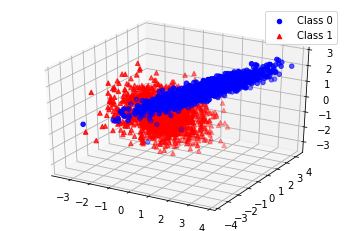

In [83]:
fig = plt.figure()
axes = fig.gca(projection='3d')
axes.scatter(cls0_f1,cls0_f2,cls0_f3,color='blue',label='Class 0')
axes.scatter(cls1_f1,cls1_f2,cls1_f3,color='red',marker='^',label='Class 1')
axes.legend()
plt.show()

In [84]:
def hypothesis(x,w,b):
    hx = np.dot(x,w) + b
    return sigmoid(hx)

In [85]:
def sigmoid(h):
    return 1.0/(1.0 + np.exp(-1.0*h))

In [86]:
def error(x,y,w,b):
    
    err = 0.0
    for i in range(x.shape[0]):
        hx = hypothesis(x[i], w, b)
        err += y[i]*np.log2(hx) + (1-y[i])*np.log2(1-hx)

    return err

In [87]:
def get_grad(x,y,w,b):
    
    grad_b = 0.0
    grad_w = np.zeros(w.shape)
    for i in range(x.shape[0]):
        hx = hypothesis(x[i], w, b)
        grad_b += (y[i]-hx)
        grad_w += (y[i]-hx)*x[i]
    
    return [grad_w, grad_b]

In [148]:
def gradient_ascent(x,y,w,b,learning_rate=0.0001):
    err = error(x,y,w,b)
    [grad_w,grad_b] = get_grad(x,y,w,b)
    w = w + learning_rate*grad_w
    b = b + learning_rate*grad_b
    return err, w, b

In [152]:
w = 2*np.random.random((x_train.shape[1],))
print(W)
b = 5*np.random.random()
loss = []
for i in range(1000):
    l, wset, bset = gradient_ascent(x_train, y_train, w, b, learning_rate=0.0001)
    loss.append(l)

[1.82907511 0.66421356 1.65732721]


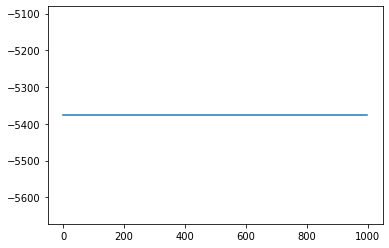

In [153]:
plt.plot(loss)
plt.show()

In [159]:
print(wset)
print(bset)

[ 0.05833693  0.52835409 -0.07117802]
0.8822544226330418


In [160]:
x_test=pd.read_csv('/Users/kaushikchaturvedula/python/chemical/Logistic_X_Test.csv')
x_test=x_test.values

In [161]:
y_test=hypothesis(x_test,wset,bset)

In [162]:
y_test

array([0.70643385, 0.83268943, 0.87210025, 0.80197709, 0.80314366,
       0.59837252, 0.80811172, 0.79593285, 0.89066551, 0.86492967,
       0.76245599, 0.71897429, 0.7867256 , 0.82262091, 0.91927898,
       0.78540118, 0.87347616, 0.78592439, 0.86807074, 0.74438846,
       0.79406946, 0.64948841, 0.63513551, 0.82539863, 0.74203949,
       0.76741705, 0.50081075, 0.83914968, 0.88879549, 0.86129762,
       0.73736641, 0.74463882, 0.702738  , 0.89331076, 0.91259833,
       0.86570463, 0.6679431 , 0.66765643, 0.85197372, 0.66353785,
       0.77939313, 0.61567774, 0.69426961, 0.73842604, 0.57370391,
       0.77327164, 0.7612896 , 0.63973878, 0.88249149, 0.87899278,
       0.8339352 , 0.82337055, 0.8200384 , 0.73119167, 0.6208648 ,
       0.70015678, 0.84612762, 0.88761467, 0.52843248, 0.81500572,
       0.76013175, 0.75543795, 0.83916332, 0.85677754, 0.64987166,
       0.89320186, 0.88453971, 0.90357128, 0.83009953, 0.66388192,
       0.74395488, 0.82755724, 0.86467755, 0.85199587, 0.72227